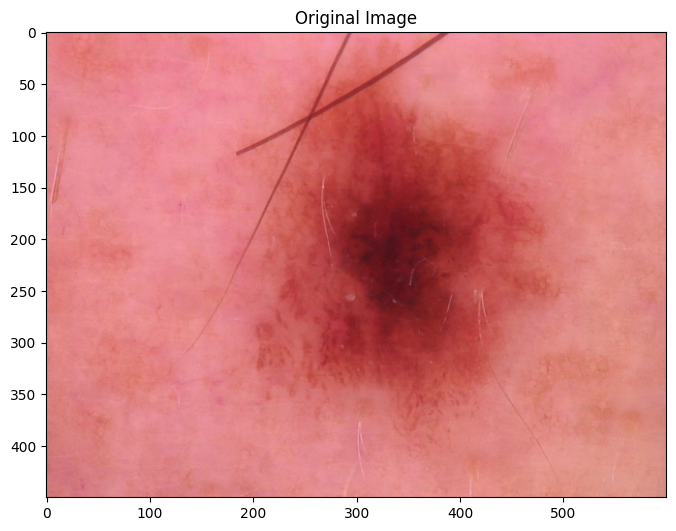

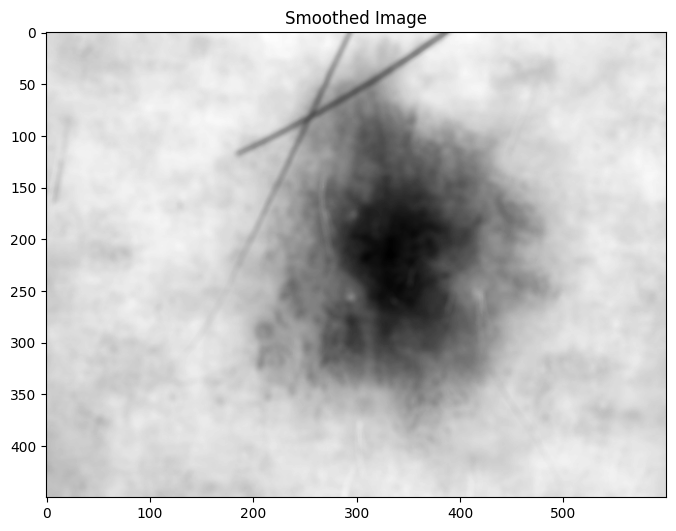

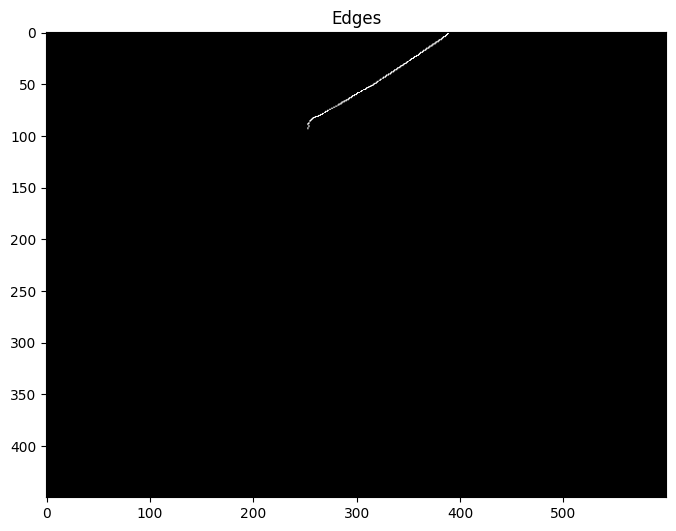

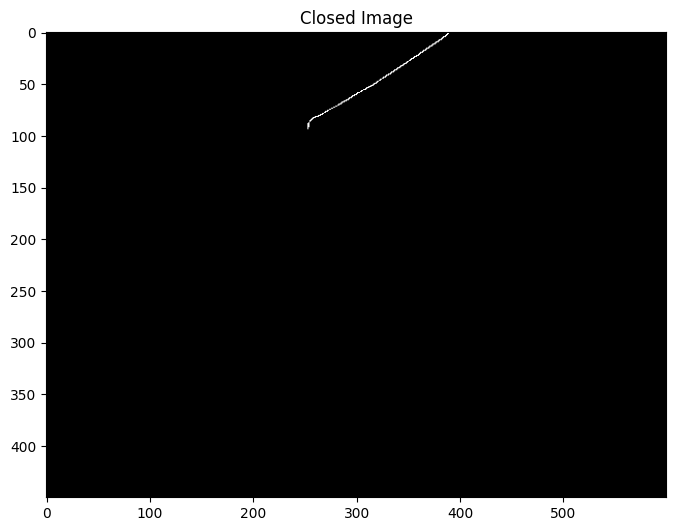

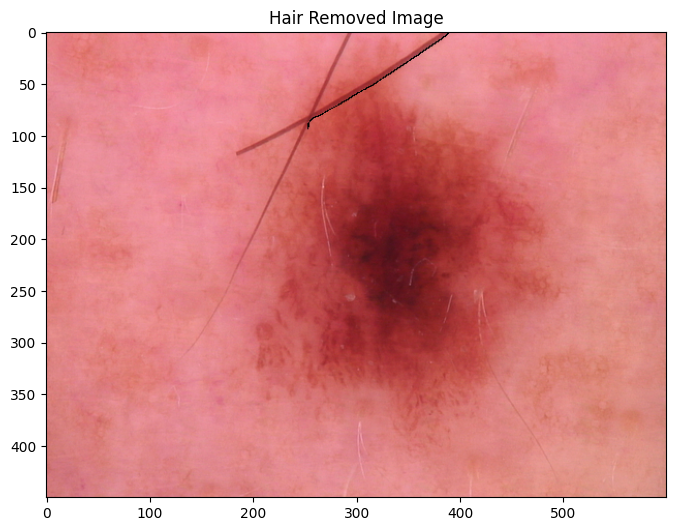

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the original image
image = cv2.imread('dataset\input_images\ISIC_0024306.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title('Original Image')
plt.show()

# Convert to grayscale for further processing
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Apply a bilateral filter to smooth the image while preserving edges
smoothed_image = cv2.bilateralFilter(gray_image, 9, 75, 75)

# Display the smoothed image
plt.figure(figsize=(8, 8))
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')
plt.show()

# Perform edge detection using the Canny detector
edges = cv2.Canny(smoothed_image, 50, 150)

# Display the edges
plt.figure(figsize=(8, 8))
plt.imshow(edges, cmap='gray')
plt.title('Edges')
plt.show()

# Use morphological operations to fill gaps and close small holes
kernel = np.ones((5, 5), np.uint8)
closed_image = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Display the closed image
plt.figure(figsize=(8, 8))
plt.imshow(closed_image, cmap='gray')
plt.title('Closed Image')
plt.show()

# Invert the closed image to use as a mask
mask = cv2.bitwise_not(closed_image)

# Remove hair by blending the original image with a white background using the mask
hair_removed_image = cv2.bitwise_and(image, image, mask=mask)

# Display the final result with hair removed
plt.figure(figsize=(8, 8))
plt.imshow(hair_removed_image)
plt.title('Hair Removed Image')
plt.show()


